<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/IMD1101/Atividade_PCA/IMD1101_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de pré-processamento
Nesse notebook será desenvolvida a atividade prática de PCA proposta na disciplina de Aprendizado de Máquina (IMD1101).

Aluno: Paulo Ricardo Dantas

## Importando as bases de dados
O primeiro passo é importar o dataset. Os datasets estão disponibilizados no repositório em que esse notebook se encontra. (https://github.com/rikdantas/Aprendizagem-de-Maquinas/tree/main/IMD1101/Atividade_PCA/)

Após fazer o download dos arquivos CSV, é necessário fazer o upload dos mesmos para o sistema de arquivos do colab.

In [19]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Importando datasets

image = pd.read_csv('Image.csv', encoding='utf-8')
madelon = pd.read_csv('Madelon.csv', encoding='utf-8')
waveform = pd.read_csv('Waveform.csv', encoding='utf-8')

## Correlação de Pearson
Nessa etapa, iremos fazer um heatmap para mostrar a correlação de Pearson para cada um dos datasets, depois iremos escolher os dez atributos relacionados de cada base.


In [11]:
# Antes de fazer a correlação, é preciso separar a coluna classe de cada uma dos datasets, pois só iremos analisar os atributos
image_class = image['classe']
madelon_class = madelon['classe']
waveform_class = waveform['classe']

# Depois iremos retirar a coluna classe dos dfs
image = image.drop(columns=['classe'])
madelon = madelon.drop(columns=['classe'])
waveform = waveform.drop(columns=['classe'])

In [12]:
image_corr = image.corr(method='pearson')
madelon_corr = madelon.corr(method='pearson')
waveform_corr = waveform.corr(method='pearson')

### Heatmap do dataset Image

<Axes: >

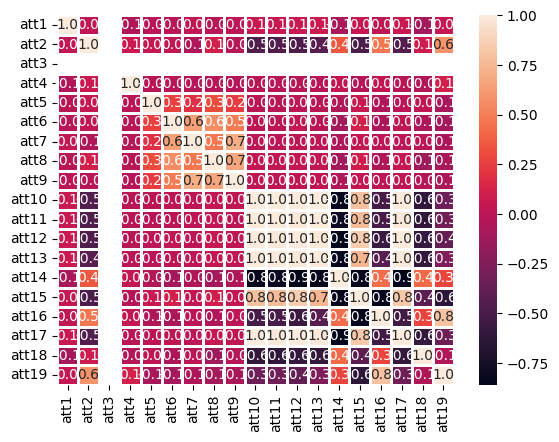

In [13]:
sns.heatmap(image_corr, annot=True, fmt=".1f", linewidths=.8)

Para achar os atributos com menor correlação irei utilizar as seguintes linhas de código que foram desenvolvidas com a ajuda do ChatGPT. Esse código vai ajudar a identificar as colunas com menor correlação principalmente em datasets com muitos atributos que fica inviável de identificar esses atributos visualmente.

In [14]:
# Somar os valores absolutos das correlações para cada coluna
soma_correlacao = image_corr.abs().sum() - 1  # Subtrair 1 para remover a autocorrelação (correlação de um atributo com ele mesmo)

# Selecionar os 10 atributos com a menor soma de correlações
menores_atributos = soma_correlacao.nsmallest(10).index

# Filtrar o DataFrame original para conter apenas esses 10 atributos
image_menores_atributos = image[menores_atributos]

# Juntando os 10 atributos com a coluna classe que foi retirada anteriormente
image_corr_pearson = pd.concat([image_menores_atributos, image_class], axis=1)

# Salvando em CSV
image_corr_pearson.to_csv('Image_Corr_Pearson.csv', index=False)

### Heatmap do dataset Madelon

<Axes: >

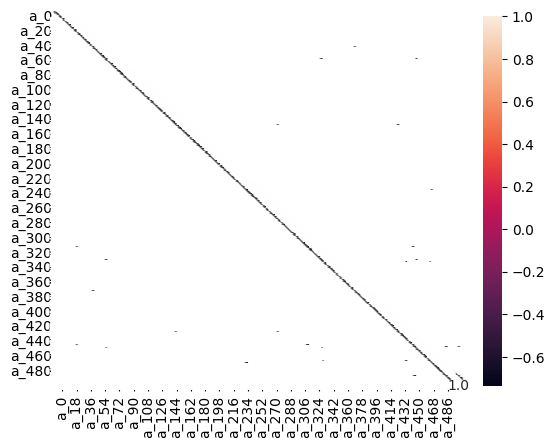

In [ ]:
sns.heatmap(madelon_corr, annot=True, fmt=".1f", linewidths=.8)

In [17]:
# Somar os valores absolutos das correlações para cada coluna
soma_correlacao = madelon_corr.abs().sum() - 1  # Subtrair 1 para remover a autocorrelação (correlação de um atributo com ele mesmo)

# Selecionar os 10 atributos com a menor soma de correlações
menores_atributos = soma_correlacao.nsmallest(10).index

# Filtrar o DataFrame original para conter apenas esses 10 atributos
madelon_menores_atributos = madelon[menores_atributos]

# Juntando os 10 atributos com a coluna classe que foi retirada anteriormente
madelon_corr_pearson = pd.concat([madelon_menores_atributos, madelon_class], axis=1)

# Salvando em CSV
madelon_corr_pearson.to_csv('Madelon_Corr_Pearson.csv', index=False)

### Heatmap do dataset Waveform

<Axes: >

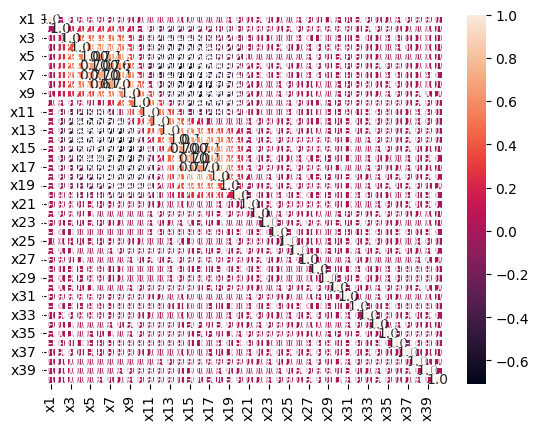

In [15]:
sns.heatmap(waveform_corr, annot=True, fmt=".1f", linewidths=.8)

In [16]:
# Somar os valores absolutos das correlações para cada coluna
soma_correlacao = waveform_corr.abs().sum() - 1  # Subtrair 1 para remover a autocorrelação (correlação de um atributo com ele mesmo)

# Selecionar os 10 atributos com a menor soma de correlações
menores_atributos = soma_correlacao.nsmallest(10).index

# Filtrar o DataFrame original para conter apenas esses 10 atributos
waveform_menores_atributos = waveform[menores_atributos]

# Juntando os 10 atributos com a coluna classe que foi retirada anteriormente
waveform_corr_pearson = pd.concat([waveform_menores_atributos, waveform_class], axis=1)

# Salvando em CSV
waveform_corr_pearson.to_csv('Waveform_Corr_Pearson.csv', index=False)

## PCA
Serão aplicados dois tipos de PCA: um que resulte em 10 componentes que consigam representar o máximo de informações e outro que vai manter 90% das informações originais.

### Utilizando PCA para manter 10 componentes

In [23]:
# Iremos carregar o dataset original novamente

image = pd.read_csv('Image.csv', encoding='utf-8')
madelon = pd.read_csv('Madelon.csv', encoding='utf-8')
waveform = pd.read_csv('Waveform.csv', encoding='utf-8')

# Separando as colunas classe dos datasets
image_class = image['classe']
madelon_class = madelon['classe']
waveform_class = waveform['classe']

image = image.drop(columns=['classe'])
madelon = madelon.drop(columns=['classe'])
waveform = waveform.drop(columns=['classe'])

In [24]:
# Antes de aplicar o PCA iremos normalizar os dados

image_normalizado = StandardScaler().fit_transform(image)
madelon_normalizado = StandardScaler().fit_transform(madelon)
waveform_normalizado = StandardScaler().fit_transform(waveform)

In [32]:
# Instaciando o PCA que vai manter 10 componentes como o PCA_A
pca_a = PCA(n_components=10)

# Aplicando o PCA
image_pca_a_array = pca_a.fit_transform(image_normalizado)
madelon_pca_a_array = pca_a.fit_transform(madelon_normalizado)
waveform_pca_a_array = pca_a.fit_transform(waveform_normalizado)

print(image_pca_a_array.shape)
print(madelon_pca_a_array.shape)
print(waveform_pca_a_array.shape)

(2310, 10)
(2600, 10)
(5000, 10)


In [33]:
# Como a saida do PCA é um array, vamos transformar em um dataframe
image_pca_a = pd.DataFrame(image_pca_a_array)
madelon_pca_a = pd.DataFrame(madelon_pca_a_array)
waveform_pca_a = pd.DataFrame(waveform_pca_a_array)

# Juntando os 10 atributos com a coluna classe que foi retirada anteriormente
image_pca_a_final= pd.concat([image_pca_a, image_class], axis=1)
madelon_pca_a_final = pd.concat([madelon_pca_a, madelon_class], axis=1)
waveform_pca_a_final = pd.concat([waveform_pca_a, waveform_class], axis=1)

# Salvando em CSV
image_pca_a_final.to_csv('Image_PCA_A.csv', index=False)
madelon_pca_a_final.to_csv('Madelon_PCA_A.csv', index=False)
waveform_pca_a_final.to_csv('Waveform_PCA_A.csv', index=False)